<table>
  <tr><td>
    <img src="h7.png">
  </td></tr>
<table>

# Latar Belakang Project

Dengan kecanggihan teknologi, kemudahan dalam menjalani hidup dapat dirasakan diberbagai bidang. Salah satunya adalah bidang keuangan. Telah banyak Bank atau perusahaan yang menawarkan jasa keuangan dengan berbagai technology canggih. Perusahaan seperti ini sekarang lebih sering disebut sebagai Financial Technology(FinTech). Perusahaan ini biasanya menggunakan apps mobile sebagai produk utamanya. Fitur pada apps tersebut merupakan salah satu poin daya jual yang penting. Sebelum seseorang tertarik untuk menggunakan sebuah apps tersebut perusahaan akan memberikan masa Uji Coba(Trial) secara gratis. Pada saat tersebut, perusahaan menyimpan berbagai perilaku(behaviour) pelanggan dalam menggunakan apps hingga seorang calon pelanggan memutuskan berlangganan atau tidak. Pada project ini, kita ditugaskan kita untuk membuat model yang bisa **memprediksi users yang tidak akan membayar langganan**. sehingga mereka akan ditawari iklan dan penawaran khusus agar berlangganan. Prediksi dilakukan terhadap semua data history users selama masa trial

# Problem Statement

Buatlah model machine learning untuk meprediksi seseorang akan berlangganan setelah mengikuti uji coba apps selama 24 jam!

# Langkah-langkah Pemodelan

1. Memuat dataset
2. Eksploratory Data Analisis
3. Data Preparation
4. Pemodelan
5. Evaluasi Model
6. Prediksi Semua User

# Memuat Dataset

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Membuka dataset

In [2]:
dataku = pd.read_csv("data_fintech.csv")
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


Keterangan Dataset:

* **user** : ID pengguna
* **first_open** : Waktu pertama kali pengguna membuka aplikasi setelah mengunduh
* **dayofweek** : Kode untuk hari penggunaan pertama (0:minggu, 1:senin, 2:selasa, dst)
* **hour**: Jam pertama kali pengguna membuka aplikasi
* **age**: Usia pengguna
* **screen_list** : Layar / halaman apa saja yang dibuka oleh pengguna dalam aplikasi
* **numscreens** : Jumlah halaman yang dibuka pengguna
* **minigame** : Apakah pengguna membuka fitur minigame (0:tidak menggunakan, 1:menggunakan)
* **used_premium_fature**: Apakah pengguna menggunakan fitur premium (0:tidak menggunakan, 1:menggunakan)
* **enrolled**: Apakah pengguna memustuskan untuk berlangganan (0:tidak berlangganan, 1:berlangganan)
* **enrolled_date**: Tanggal berlangganan pertama kali
* **liked**: Apakah pengguna menyukai aplikasi(0:tidak menyukai, 1:menyukai)

# Eksploratory Data Analysis

## Dimensi Data

In [3]:
dataku.shape

(50000, 12)

## Check Tipe Data

In [4]:
tipe_data=dataku.dtypes
tipe_data

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

## Ringkasan Data

In [5]:
ringkasan= dataku.describe()
ringkasan

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Visualisasi Data Numerik

In [6]:
# Revisi kolom num_screens
dataku['screen_list']=dataku.screen_list.astype(str) + ','

In [7]:
dataku['num_screens']=dataku.screen_list.str.count(',')

In [8]:
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan,",3,0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,19


In [9]:
dataku.drop(columns=['numscreens'], inplace=True)
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19


In [10]:
# Cek kolom hour
dataku.hour[1]

' 01:00:00'

In [11]:
dataku.hour = dataku.hour.str.slice(1,3).astype(int)
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19


In [12]:
# mendefinisikan variael khusus numerik
dataku_numerik = dataku.drop(columns=['user', 'first_open', 'screen_list', 'enrolled_date'], inplace=False)

In [13]:
dataku_numerik.head()

,dayofweek,hour,age,minigame,used_premium_feature,enrolled,liked,num_screens
0,3,2,23,0,0,0,0,13
1,6,1,24,0,0,0,0,11
2,1,19,23,0,1,0,1,3
3,4,16,28,0,0,1,0,17
4,1,18,31,0,0,1,1,19


In [14]:
dataku_numerik.columns[0]

'dayofweek'

### Plot Histogram

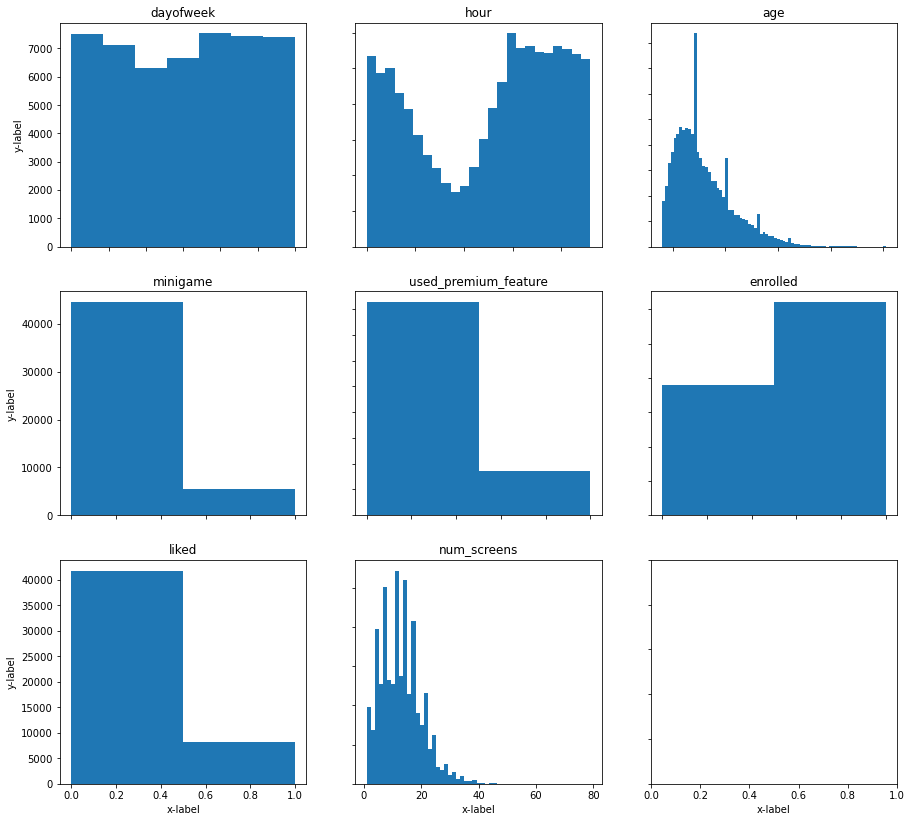

In [15]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15, 14)
jumlah_bin = np.size(dataku_numerik.iloc[:,0].unique())
axs[0, 0].hist(dataku_numerik.iloc[:,0], bins=jumlah_bin)
axs[0, 0].set_title(dataku_numerik.columns[0])

jumlah_bin = np.size(dataku_numerik.iloc[:,1].unique())
axs[0, 1].hist(dataku_numerik.iloc[:,1], bins=jumlah_bin)
axs[0, 1].set_title(dataku_numerik.columns[1])

jumlah_bin = np.size(dataku_numerik.iloc[:,2].unique())
axs[0, 2].hist(dataku_numerik.iloc[:,2], bins=jumlah_bin)
axs[0, 2].set_title(dataku_numerik.columns[2])

jumlah_bin = np.size(dataku_numerik.iloc[:,3].unique())
axs[1, 0].hist(dataku_numerik.iloc[:,3], bins=jumlah_bin)
axs[1, 0].set_title(dataku_numerik.columns[3])

jumlah_bin = np.size(dataku_numerik.iloc[:,4].unique())
axs[1, 1].hist(dataku_numerik.iloc[:,4], bins=jumlah_bin)
axs[1, 1].set_title(dataku_numerik.columns[4])

jumlah_bin = np.size(dataku_numerik.iloc[:,5].unique())
axs[1, 2].hist(dataku_numerik.iloc[:,5], bins=jumlah_bin)
axs[1, 2].set_title(dataku_numerik.columns[5])

jumlah_bin = np.size(dataku_numerik.iloc[:,6].unique())
axs[2, 0].hist(dataku_numerik.iloc[:,6], bins=jumlah_bin)
axs[2, 0].set_title(dataku_numerik.columns[6])

jumlah_bin = np.size(dataku_numerik.iloc[:,7].unique())
axs[2, 1].hist(dataku_numerik.iloc[:,7], bins=jumlah_bin)
axs[2, 1].set_title(dataku_numerik.columns[7])


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Plot Korelasi Variabel Numerik

In [16]:
# Membuat correlation matrix
korelasi = dataku_numerik.drop(columns=['enrolled'], inplace=False).corrwith(dataku_numerik.enrolled)

<AxesSubplot:title={'center':'Korelasi Variabel terhadap keputusan Enrolled'}>

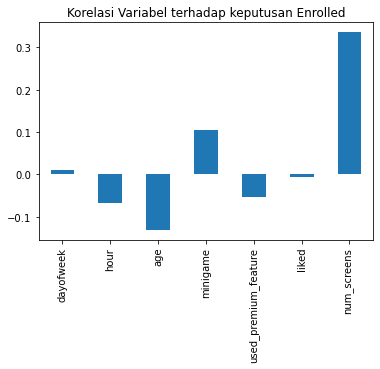

In [17]:
korelasi.plot.bar(title='Korelasi Variabel terhadap keputusan Enrolled')

<AxesSubplot:>

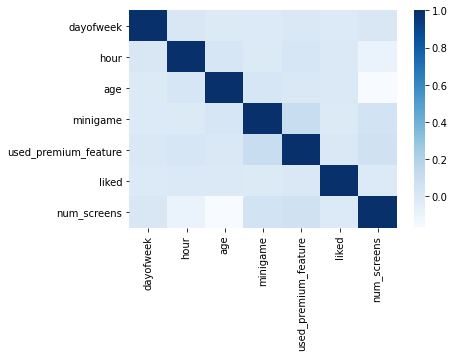

In [18]:
matriks_korelasi = dataku_numerik.drop(columns=['enrolled'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues')

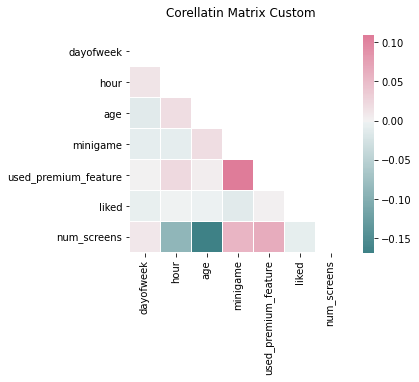

In [19]:
mask = np.zeros_like(matriks_korelasi, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Membuat correlation matrix dengan heatmap custom
ax=plt.axes()
cmap_ku = sns.diverging_palette(200,0, as_cmap=True)
sns.heatmap(matriks_korelasi, cmap=cmap_ku, mask=mask, linewidth = 0.5 , center=0, square=True)

ax = plt.suptitle('Corellatin Matrix Custom')

# Data Preparation

In [20]:
dataku.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19


In [21]:
dataku.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
num_screens              int64
dtype: object

## Parsing (Mengubah tipe data `first_open` dan `enrolled_date` menjadi `datetime64[ns]` 

In [22]:
# Proses Parsing
from dateutil import parser
dataku.first_open = [parser.parse(baris_data) for baris_data in dataku.first_open]
dataku.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
num_screens                      int64
dtype: object

In [23]:
dataku.enrolled_date = [parser.parse(baris_data) if isinstance(baris_data, str) else baris_data for baris_data in dataku.enrolled_date]
dataku.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
num_screens                      int64
dtype: object

## Dummy Variabel untuk Variabel `screen_list`

Salah satu variabel yang penting adalah variabel yang menunjukkan screen apa saja yang diakses oleh user pada 24 jam masa trial. Hal itu dicatat pada kolom `screen_list`. Namun pada dataset yang kita pakai, semua screen list dituliskan pada sebuah kolom. Kita perlu memecahnya dan membuat kolom 'dummy' baru untuk masing-masing screen list dengan keterangan diakses = 1, dan tidak diakses = 0. Untuk melakukannya diberikan data tambahan yaitu top_screen.csv berikut yang memuat screen-screen yang paling sering dikunjungi user.

In [24]:
# Mengimport top screens
top_screens = pd.read_csv('top_screens.csv')
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [25]:
top_screens = np.array(top_screens.loc[:,'top_screens'])
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [26]:
# Membuat cadangan data
dataku2=dataku.copy()

In [27]:
# Membuat kolom untuk setiap top_screens
for layar in top_screens:
    dataku2[layar] = dataku2.screen_list.str.contains(layar).astype(int)

In [28]:
dataku2.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaT,...,0,1,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,0


In [29]:
for layar in top_screens:
    dataku2['screen_list'] = dataku2.screen_list.str.replace(layar+',', '')

In [30]:
# Item non top_screens di screen_list
dataku2['lainnya'] = dataku2.screen_list.str.count(',')
dataku2.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,lainnya
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10


In [31]:
top_screens.sort()

In [32]:
top_screens

array(['AccountView', 'Alerts', 'BankVerification', 'CC1', 'CC1Category',
       'CC3', 'Credit1', 'Credit2', 'Credit3', 'Credit3Container',
       'Credit3Dashboard', 'Cycle', 'EditProfile', 'Finances',
       'Institutions', 'Leaderboard', 'ListPicker', 'Loan', 'Loan2',
       'Loan3', 'Loan4', 'Login', 'NetworkFailure', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor',
       'ProfileEmploymentLength', 'ProfileJobTitle',
       'ProfileMaritalStatus', 'ProfilePage', 'ResendToken',
       'RewardDetail', 'Rewards', 'RewardsContainer', 'Saving1',
       'Saving10', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5',
       'Saving6', 'Saving7', 'Saving8', 'Saving9', 'SecurityModal',
       'Splash', 'TransactionList', 'VerifyAnnualIncome', 'VerifyCountry',
       'VerifyDateOfBirth', 'VerifyHousing', 'VerifyHousingAmount',
       'VerifyIncomeType', 'VerifyMobile', 'VerifyPhone', 'WebView',
       'idscreen', 'location'], dtype=object)

## Menggabungkan beberapa screen yang identik menjadi 1 kolom

In [33]:
# Proses penggabungan beberapa screen yang saja(Funelling)

layar_loan = ['Loan',
             'Loan2',
             'Loan3',
             'Loan4']

dataku2['jumlah_loan'] = dataku2[layar_loan].sum(axis=1)
dataku2.drop(columns=layar_loan, inplace=True)

layar_saving = ['Saving1',
                'Saving2',
                'Saving2Amount',
                'Saving4',
                'Saving5',
                'Saving6',
                'Saving7',
                'Saving8',
                'Saving9',
                'Saving10']
                
dataku2['jumlah_saving'] = dataku2[layar_saving].sum(axis=1)
dataku2.drop(columns=layar_saving, inplace=True)

layar_credit = ['Credit1',
               'Credit2',
               'Credit3',
               'Credit3Container',
               'Credit3Dashboard']

dataku2['jumlah_kredit'] = dataku2[layar_credit].sum(axis=1)
dataku2.drop(columns=layar_credit, inplace=True)

layar_cc = ['CC1',
               'CC1Category',
               'CC3']

dataku2['jumlah_cc'] = dataku2[layar_cc].sum(axis=1)
dataku2.drop(columns=layar_cc, inplace=True)

In [34]:
dataku2.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,lainnya,jumlah_loan,jumlah_saving,jumlah_kredit,jumlah_cc
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",0,0,0,NaT,...,0,0,0,0,0,7,2,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,5,2,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,,0,1,0,NaT,...,0,0,0,0,0,0,1,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,6,2,0,3,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,10,2,0,3,0


## Memilih baris data yang melakukan enrolled

In [35]:
dataku_enrolled = dataku2[dataku2.enrolled==1]
dataku_enrolled.enrolled.value_counts()

1    31074
Name: enrolled, dtype: int64

## Memilih baris data dengan enroled date pada kurun waktu 24 jam

In [37]:
import datetime

In [38]:
selisih=[]

for i in dataku_enrolled.index:
    slsh = ((dataku_enrolled.enrolled_date[i] - dataku_enrolled.first_open[i]).total_seconds())/3600
    selisih.append(slsh)

In [39]:
dataku_enrolled['jam_selisih'] = selisih
dataku_enrolled.head()

<ipython-input-39-117682c388f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataku_enrolled['jam_selisih'] = selisih


,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,ResendToken,TransactionList,NetworkFailure,ListPicker,lainnya,jumlah_loan,jumlah_saving,jumlah_kredit,jumlah_cc,jam_selisih
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,6,2,0,3,0,0.050877
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,10,2,0,3,0,0.096994
5,56480,2013-04-03 09:58:15.752,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",0,0,1,2013-04-03 09:59:03.291,...,0,0,0,0,6,2,0,3,0,0.013205
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",1,1,1,2013-04-27 22:24:54.542,...,0,0,0,0,19,3,0,0,0,920.048048
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,product_review,product_review,product_rev...",0,0,1,2013-04-26 18:31:58.923,...,0,0,0,0,11,2,0,0,0,0.161919


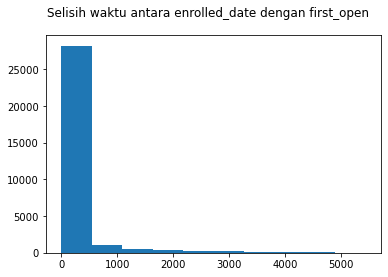

In [40]:
# membuat histogram dataku selisih
plt.hist(dataku_enrolled.jam_selisih.dropna())
plt.suptitle('Selisih waktu antara enrolled_date dengan first_open')
plt.show()

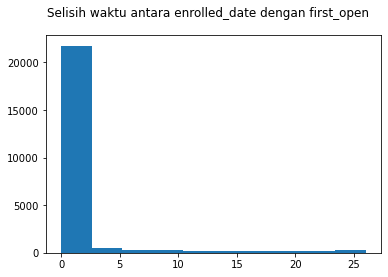

In [41]:
plt.hist(dataku_enrolled.jam_selisih.dropna(), range=[0,26])
plt.suptitle('Selisih waktu antara enrolled_date dengan first_open')
plt.show()

Pada langkah ini kita memeberikan nilai `enrolled` = 0 untuk user yang tidak berlangganan pada 24 jam pertamanya. Sedangkan yang melakukan enrolled pada kurun waktu 24 jam pertama diberi label 1.

In [42]:
# Memfilter nilai selisih > 24 jam
dataku_enrolled.loc[dataku_enrolled.jam_selisih>24, 'enrolled'] = 0
dataku_enrolled.head()

C:\Users\Joko Eliyanto\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,ResendToken,TransactionList,NetworkFailure,ListPicker,lainnya,jumlah_loan,jumlah_saving,jumlah_kredit,jumlah_cc,jam_selisih
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,6,2,0,3,0,0.050877
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,10,2,0,3,0,0.096994
5,56480,2013-04-03 09:58:15.752,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",0,0,1,2013-04-03 09:59:03.291,...,0,0,0,0,6,2,0,3,0,0.013205
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",1,1,0,2013-04-27 22:24:54.542,...,0,0,0,0,19,3,0,0,0,920.048048
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,product_review,product_review,product_rev...",0,0,1,2013-04-26 18:31:58.923,...,0,0,0,0,11,2,0,0,0,0.161919


## Mendefinisikan Variabel Dependen(y) & Independen(X)

In [43]:
# Mendefinisikan Var Dependen
y = np.array(dataku_enrolled['enrolled'])
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
# Menghilangkan beberapa kolom yang redundant
X=np.array(dataku_enrolled.drop(columns = ['user', 
                                   'first_open', 
                                   'screen_list', 
                                   'enrolled', 
                                   'enrolled_date', 
                                   'ProfileChildren ', 
                                   'jam_selisih']))
X

array([[ 4, 16, 28, ...,  0,  3,  0],
       [ 1, 18, 31, ...,  0,  3,  0],
       [ 2,  9, 20, ...,  0,  3,  0],
       ...,
       [ 0, 19, 36, ...,  0,  0,  0],
       [ 3, 13, 32, ...,  0,  3,  0],
       [ 6, 12, 27, ...,  0,  0,  0]], dtype=int64)

## Membagi Data Menjadi Data Latih dan Data Test

In [45]:
# Membagi menjadi training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 111)

## Standarisasi Feature

In [46]:
# Preprocessing Standarizations (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [47]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Pemodelan

In [48]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver = 'liblinear',
                               penalty='l1')

In [49]:
classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [50]:
# Memprediksi test set
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
y_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

# Evaluasi Model

## Confussion Matrix

In [53]:
# Mengevaluasi model dengan confussion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm =confusion_matrix(y_test, y_pred)
cm

array([[ 487,  961],
       [ 298, 4469]], dtype=int64)

<AxesSubplot:xlabel='Prediksi', ylabel='Akurasi'>

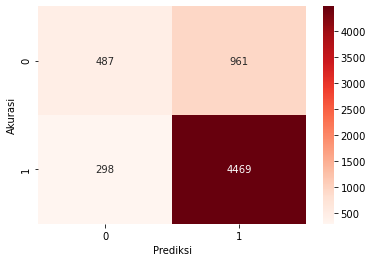

In [54]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

## Classification Report

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3777
           1       0.76      0.73      0.74      3794

    accuracy                           0.75      7571
   macro avg       0.75      0.75      0.75      7571
weighted avg       0.75      0.75      0.75      7571



## Accuracy Score

In [84]:
# Menggunakan accuracy_score
evaluasi = accuracy_score(y_test, y_pred)
print('Akurasi:{:.2f}'.format(evaluasi*100))

Akurasi:74.93


## Cross Validation

In [85]:
# Validasi dengan 10-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [86]:
accuracies.mean()

0.7500411696183916

In [87]:
accuracies.std()

0.009223312280535776

In [88]:
print('Akurasi Regresi Logistik = {:.2f} +/- {:.2f}'.format(accuracies.mean()*100, accuracies.std()*100))

Akurasi Regresi Logistik = 75.00 +/- 0.92


# Perbaiki Model

Terjadi ketidakimbangan data latih, maka perlu diperbaiki

In [61]:
data=dataku2.reset_index(drop=True)

In [71]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'num_screens', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'lainnya', 'jumlah_loan', 'jumlah_saving',
       'jumlah_kredit', 'jumlah_cc'],
      dtype='object')

In [63]:
# Melaukan teknik undersampling
index_not_enrolled = np.array(data[data.enrolled==0].index)
n_not_enrolled = len(index_not_enrolled)
index_enrolled  = np.array(data[data.enrolled==1].index)

In [64]:
index_data_enrolled  = np.random.choice(index_enrolled , n_not_enrolled, replace=False)
index_data_enrolled

array([ 3196, 40838, 34575, ..., 19803, 21296, 31197], dtype=int64)

In [65]:
index_data_baru = np.concatenate([index_not_enrolled, index_data_enrolled])
len(index_data_baru)

37852

In [66]:
data.shape

(50000, 53)

In [67]:
data_baru = data.iloc[index_data_baru, :]

In [68]:
data_baru.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,lainnya,jumlah_loan,jumlah_saving,jumlah_kredit,jumlah_cc
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",0,0,0,NaT,...,0,0,0,0,0,7,2,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,5,2,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,,0,1,0,NaT,...,0,0,0,0,0,0,1,0,0,0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview,",0,0,0,NaT,...,0,0,0,0,0,3,0,0,0,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Home,product_review,product_review2,ScanPrevie...",0,1,0,NaT,...,0,0,1,0,0,8,2,0,3,0


## Mendefinisikan Variabel Dependen(y) & Independen(X)

In [69]:
# Mendefinisikan Var Dependen
y = np.array(data_baru['enrolled'])
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
# Menghilangkan beberapa kolom yang redundant
X=np.array(data_baru.drop(columns = ['user', 
                                   'first_open', 
                                   'screen_list', 
                                   'enrolled', 
                                   'enrolled_date', 
                                   'ProfileChildren ']))
X

array([[ 3,  2, 23, ...,  0,  0,  0],
       [ 6,  1, 24, ...,  0,  0,  0],
       [ 1, 19, 23, ...,  0,  0,  0],
       ...,
       [ 5, 22, 28, ...,  0,  2,  0],
       [ 4, 18, 34, ...,  0,  0,  0],
       [ 3,  2, 66, ...,  0,  0,  0]], dtype=int64)

## Membagi Data Menjadi Data Latih dan Data Test

In [73]:
# Membagi menjadi training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 111)

## Standarisasi Feature

In [74]:
# Preprocessing Standarizations (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [75]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Pemodelan

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0, solver = 'liblinear',
                               penalty='l1')

In [77]:
classifier2.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [78]:
# Memprediksi test set
y_pred = classifier2.predict(X_test)

In [79]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [80]:
y_test

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Evaluasi Model

## Confussion Matrix

In [81]:
# Mengevaluasi model dengan confussion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm =confusion_matrix(y_test, y_pred)
cm

array([[2915,  862],
       [1036, 2758]], dtype=int64)

<AxesSubplot:xlabel='Prediksi', ylabel='Akurasi'>

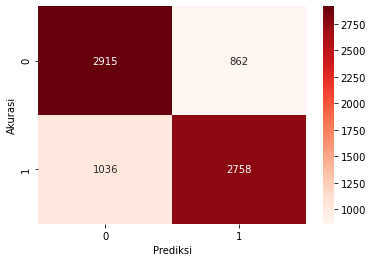

In [82]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

## Classification Report

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3777
           1       0.76      0.73      0.74      3794

    accuracy                           0.75      7571
   macro avg       0.75      0.75      0.75      7571
weighted avg       0.75      0.75      0.75      7571



## Accuracy Score

In [90]:
# Menggunakan accuracy_score
evaluasi = accuracy_score(y_test, y_pred)
print('Akurasi:{:.2f}'.format(evaluasi*100))

Akurasi:74.93


## Cross Validation

In [91]:
# Validasi dengan 10-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier2, X=X_train, y=y_train, cv=10)

In [92]:
accuracies.mean()

0.7500411696183916

In [93]:
accuracies.std()

0.009223312280535776

In [94]:
print('Akurasi Regresi Logistik = {:.2f} +/- {:.2f}'.format(accuracies.mean()*100, accuracies.std()*100))

Akurasi Regresi Logistik = 75.00 +/- 0.92


# Prediksi Semua User

Setelah memperoleh model, kemudian kita lakukan prediksi ke semua user pada data history. Baik yang melakukan registrasi pada 24 jam pertamanya atau tidak. Khusus untuk pelanggan yang melakukan

In [96]:
dataku2.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'num_screens', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'lainnya', 'jumlah_loan', 'jumlah_saving',
       'jumlah_kredit', 'jumlah_cc'],
      dtype='object')

In [97]:
#Menyiapkan data untuk prediksi semua data
y = dataku2['enrolled']
X=np.array(dataku2.drop(columns = ['user', 
                                   'first_open', 
                                   'screen_list', 
                                   'enrolled', 
                                   'enrolled_date', 
                                   'ProfileChildren ']))

In [98]:
# Memprediksi test set
y_pred = classifier2.predict(X)

In [99]:
user_id=dataku2['user']

In [100]:
# Menggabungkan semuanya
hasil_akhir=pd.DataFrame({'user':user_id,
                         'asli':y,
                         'prediksi':y_pred})
hasil_akhir

,user,asli,prediksi
0,235136,0,1
1,333588,0,1
2,254414,0,0
3,234192,1,1
4,51549,1,1
...,...,...,...
49995,222774,1,1
49996,169179,0,0
49997,302367,0,1
49998,324905,1,1
